In [1]:
%load_ext autoreload
%autoreload 2
import epa_pipeline as ep
import ml_pipe as mp
import model_analyzer as ma
import new_pipe as nw
import has_violation as hv
import numpy as np
import pandas as pd

In [7]:
df = hv.go()

/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/has_violation.py:70: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prev_vios = pd.concat([prev_vios, vios_this_yr], ignore_index=True)


In [9]:
df = nw.add_acs_features(df)

In [10]:
df.columns

Index(['ID_NUMBER', 'YEAR_EVALUATED', 'HasViolation',
       'DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER',
       'DAYS_SINCE_VIOLATIONS_IN_STATE_CODE',
       'DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE', 'NUMBER_VIOLATIONS_IN_ID_NUMBER',
       'NUMBER_VIOLATIONS_IN_STATE_CODE', 'NUMBER_VIOLATIONS_IN_ZIP_CODE',
       'IsLQG', 'IsTSDF', 'NumInMyState', 'NumInMyZIP', 'early  ID_NUMBER avg',
       'early  ID_NUMBER sum', 'early  ID_NUMBER count',
       'last early  ID_NUMBER', 'early  ZIP_CODE avg', 'early  ZIP_CODE sum',
       'early  ZIP_CODE count', 'last early  ZIP_CODE',
       'early  STATE_CODE avg', 'early  STATE_CODE sum',
       'early  STATE_CODE count', 'last early  STATE_CODE',
       'late  ID_NUMBER avg', 'late  ID_NUMBER sum', 'late  ID_NUMBER count',
       'last late  ID_NUMBER', 'late  ZIP_CODE avg', 'late  ZIP_CODE sum',
       'late  ZIP_CODE count', 'last late  ZIP_CODE', 'late  STATE_CODE avg',
       'late  STATE_CODE sum', 'late  STATE_CODE count',
       'last late  STATE_C

In [3]:
train_x, train_y, test_x, test_y, features = nw.temporal_split(df)

Index(['early  ID_NUMBER avg', 'last early  ZIP_CODE',
       'NUMBER_VIOLATIONS_IN_STATE_CODE',
       'DAYS_SINCE_VIOLATIONS_IN_STATE_CODE', 'early  ZIP_CODE count', 'IsLQG',
       'early  ID_NUMBER sum', 'last late  ZIP_CODE',
       'NUMBER_VIOLATIONS_IN_ZIP_CODE', 'late  ID_NUMBER avg',
       'late  ZIP_CODE avg', 'early  STATE_CODE count',
       'late  ID_NUMBER count', 'last late  STATE_CODE', 'early  ZIP_CODE avg',
       'early  STATE_CODE sum', 'late  ZIP_CODE sum', 'late  STATE_CODE sum',
       'NumInMyState', 'last late  ID_NUMBER', 'early  ZIP_CODE sum',
       'last early  STATE_CODE', 'DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE',
       'late  ID_NUMBER sum', 'early  STATE_CODE avg',
       'early  ID_NUMBER count', 'late  STATE_CODE count',
       'late  STATE_CODE avg', 'NUMBER_VIOLATIONS_IN_ID_NUMBER',
       'last early  ID_NUMBER', 'NumInMyZIP', 'late  ZIP_CODE count', 'IsTSDF',
       'DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER'],
      dtype='object')

In [6]:
train_x[0].isnull().sum()

early  ID_NUMBER avg                   0
last early  ZIP_CODE                   0
NUMBER_VIOLATIONS_IN_STATE_CODE        0
DAYS_SINCE_VIOLATIONS_IN_STATE_CODE    0
early  ZIP_CODE count                  0
IsLQG                                  0
early  ID_NUMBER sum                   0
last late  ZIP_CODE                    0
NUMBER_VIOLATIONS_IN_ZIP_CODE          0
late  ID_NUMBER avg                    0
late  ZIP_CODE avg                     0
early  STATE_CODE count                0
late  ID_NUMBER count                  0
last late  STATE_CODE                  0
early  ZIP_CODE avg                    0
early  STATE_CODE sum                  0
late  ZIP_CODE sum                     0
late  STATE_CODE sum                   0
NumInMyState                           0
last late  ID_NUMBER                   0
early  ZIP_CODE sum                    0
last early  STATE_CODE                 0
DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE      0
late  ID_NUMBER sum                    0
early  STATE_COD

In [8]:
for x in test_x[0].columns:
    print(test_x[0][x].max())
    print(test_x[0][x].min())
    print(test_x[0][x].sum())

0.0
0.0
0.0
-1.0
-1.0
-1088081.0
1798.0
0.0
13151954.0
256.0
-1.0
-886485.0
0.0
0.0
0.0
1
0
265608
0.0
0.0
0.0
-1.0
-1.0
-1088081.0
88.0
0.0
307984.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
-1.0
-1088081.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
200459.0
0.0
74872400212.0
-1.0
-1.0
-1088081.0
0.0
0.0
0.0
-1.0
-1.0
-1088081.0
364.0
-1.0
4482071.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
31.0
0.0
268938.0
-1.0
-1.0
-1088081.0
1965.0
0.0
136936846.0
0.0
0.0
0.0
1
0
5698
364.0
-1.0
8931991.0


RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

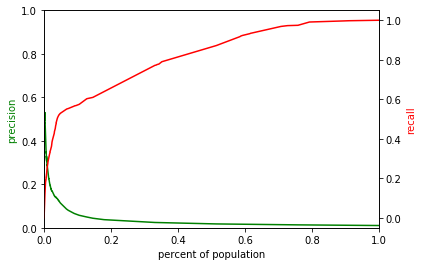

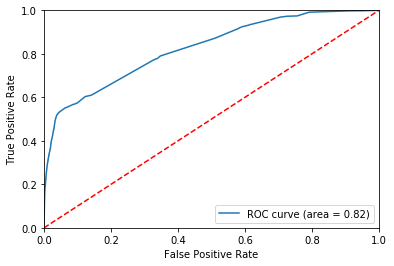

AB{'algorithm': 'SAMME', 'n_estimators': 10}


<Figure size 432x288 with 0 Axes>

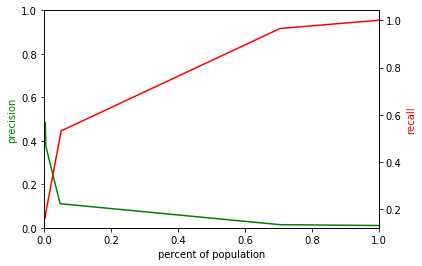

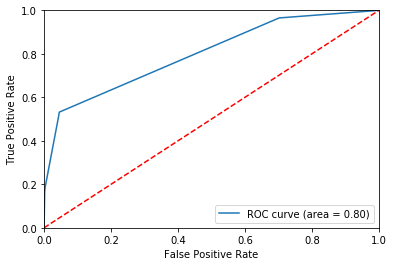

DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

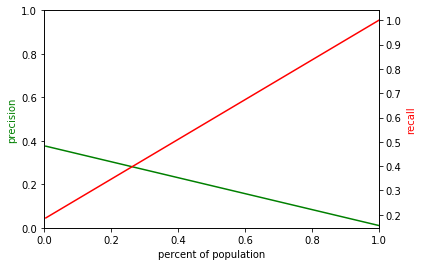

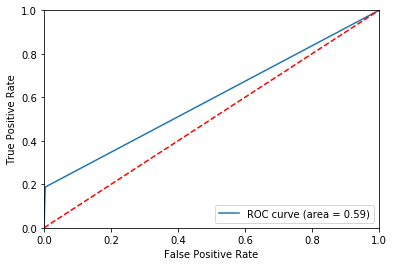

DT{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

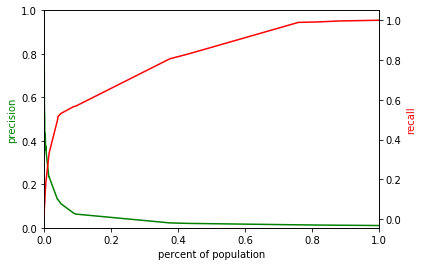

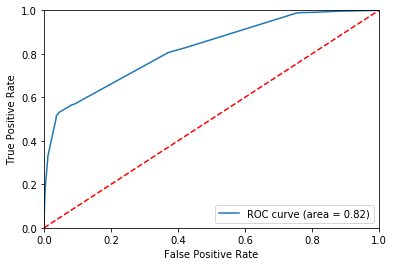

DT{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

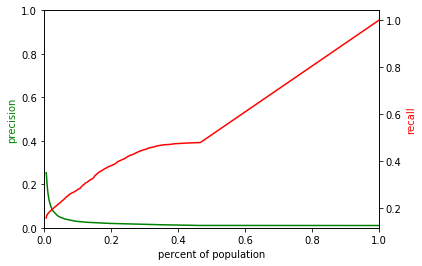

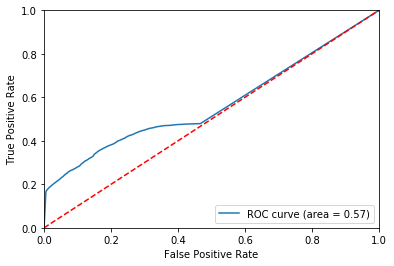

DT{'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

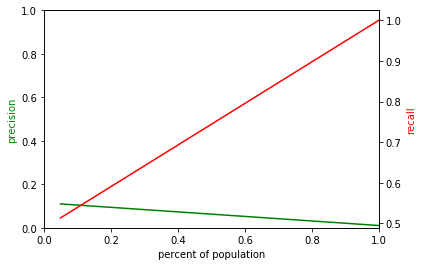

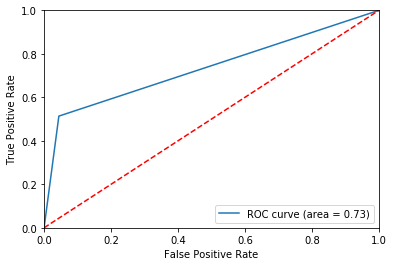

DT{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

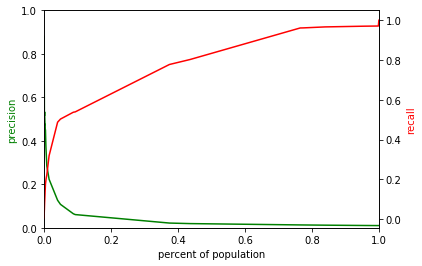

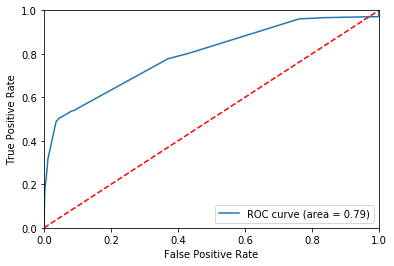

DT{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

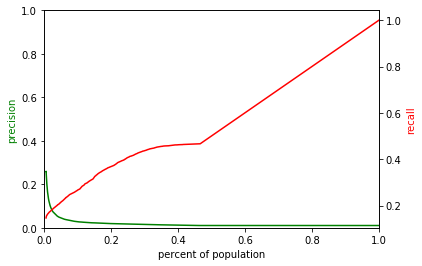

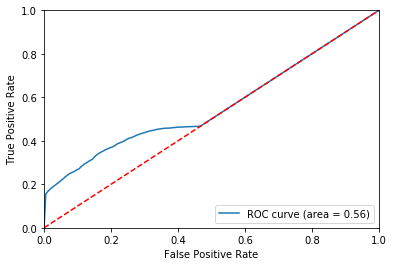

RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

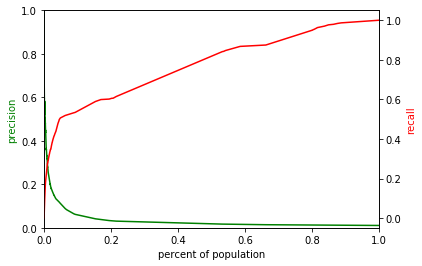

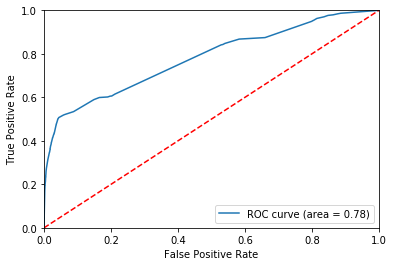

AB{'algorithm': 'SAMME', 'n_estimators': 10}


<Figure size 432x288 with 0 Axes>

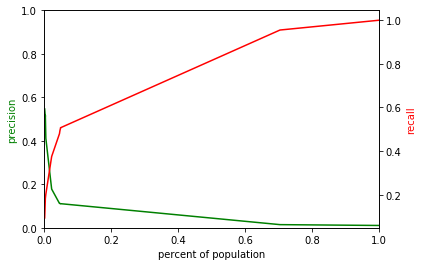

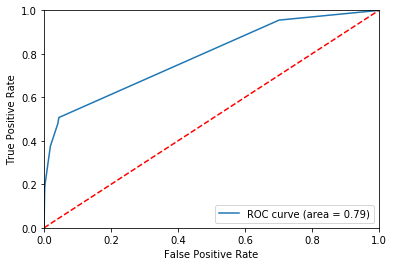

DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

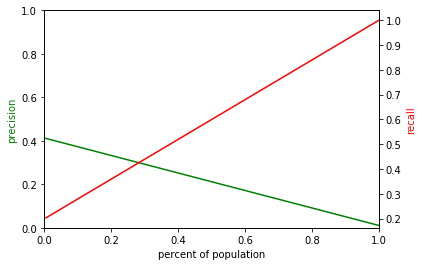

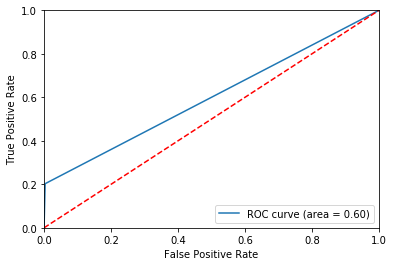

DT{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

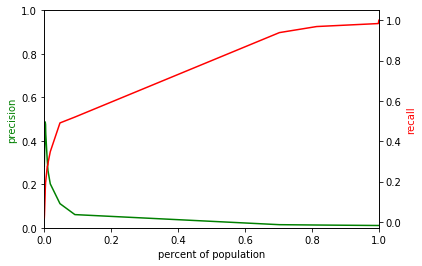

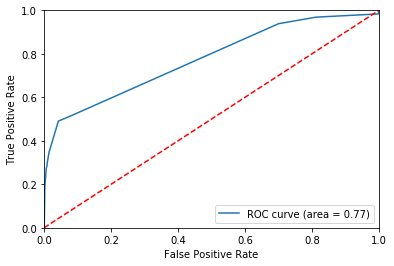

DT{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

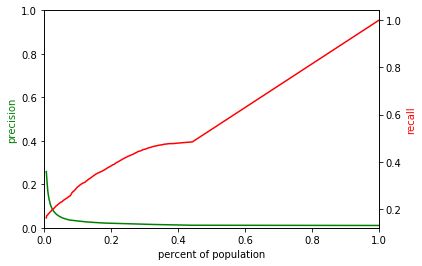

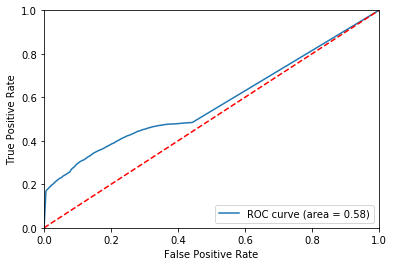

DT{'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

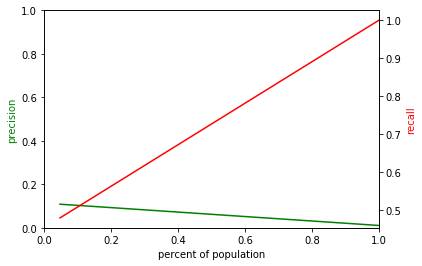

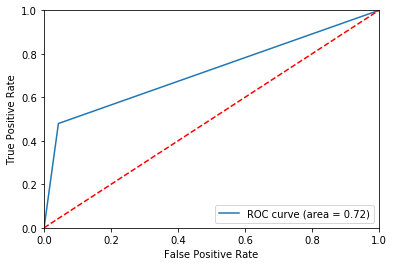

DT{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

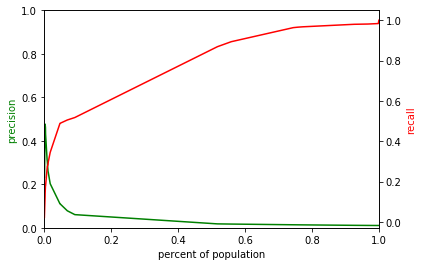

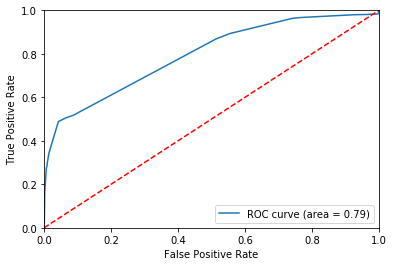

DT{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

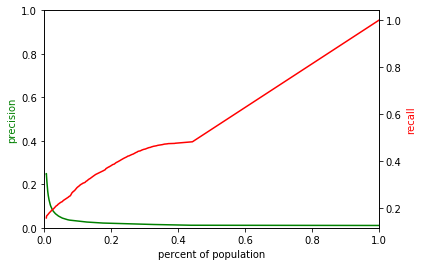

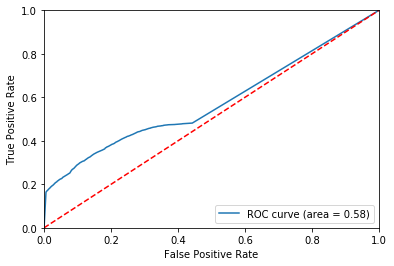

RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

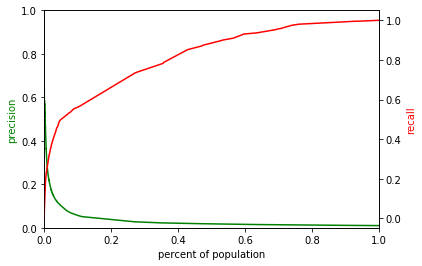

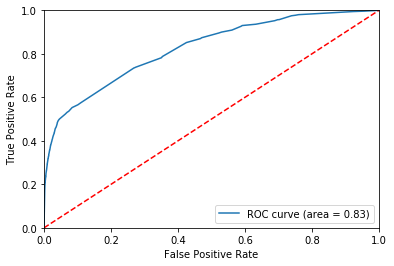

AB{'algorithm': 'SAMME', 'n_estimators': 10}


<Figure size 432x288 with 0 Axes>

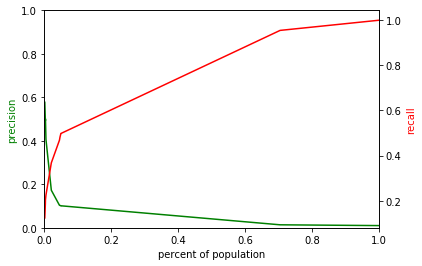

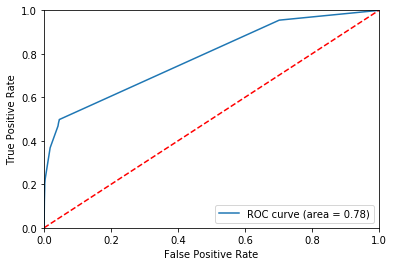

DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

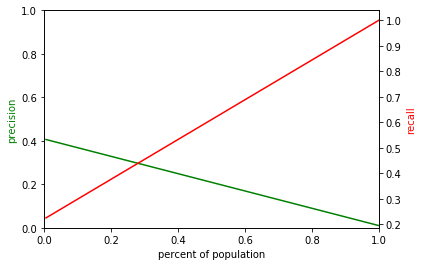

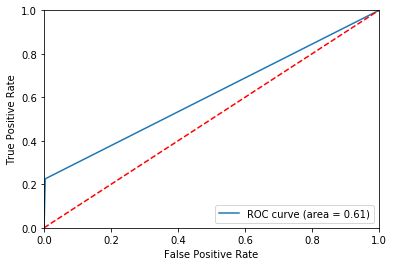

DT{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

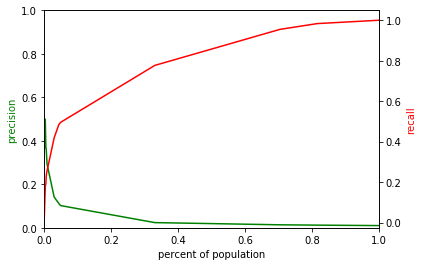

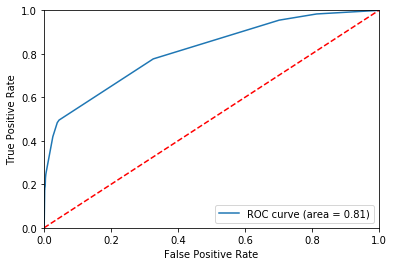

DT{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

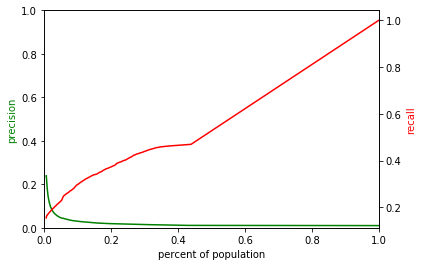

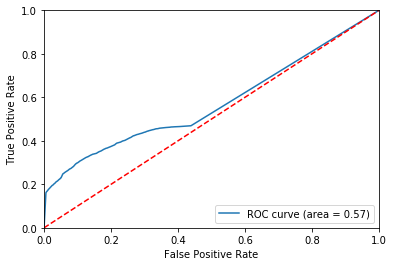

DT{'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

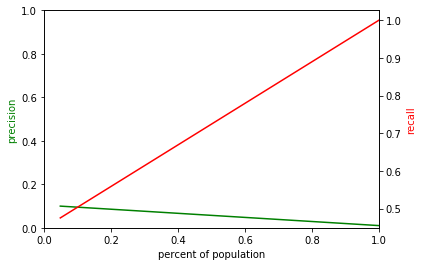

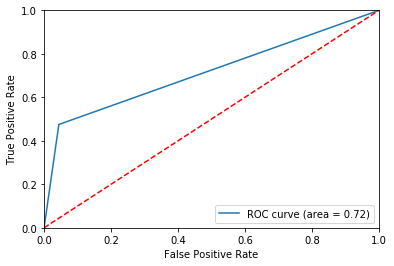

DT{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

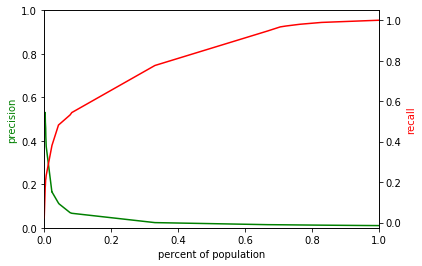

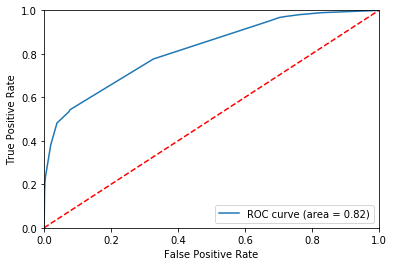

DT{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

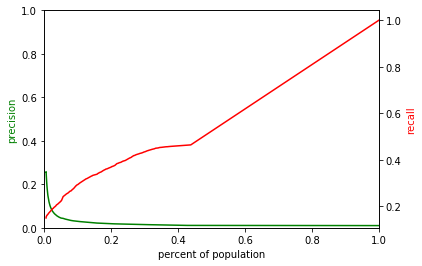

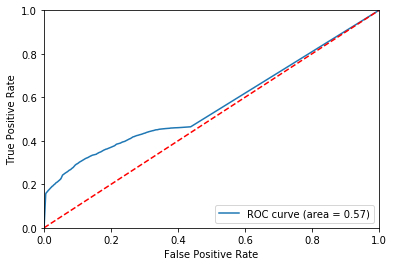

RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

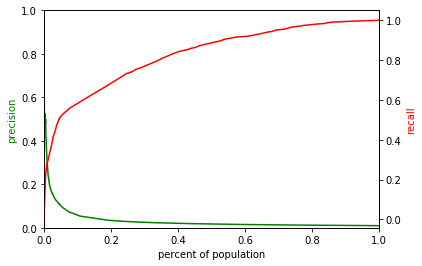

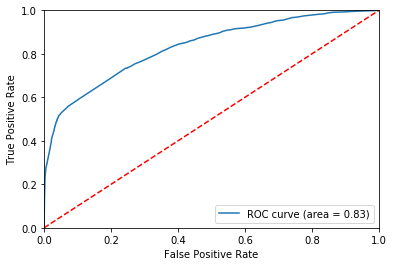

AB{'algorithm': 'SAMME', 'n_estimators': 10}


<Figure size 432x288 with 0 Axes>

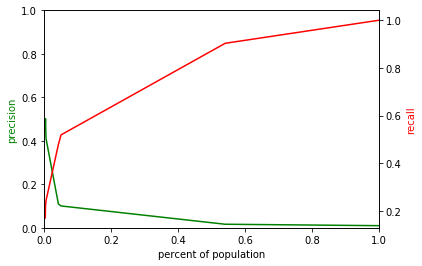

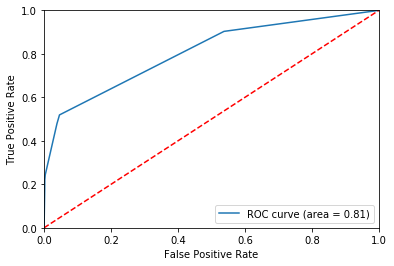

DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

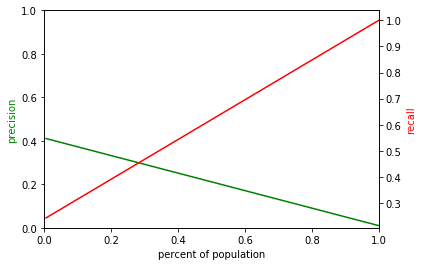

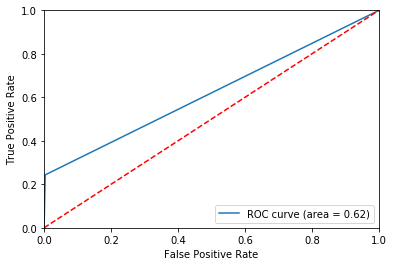

DT{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

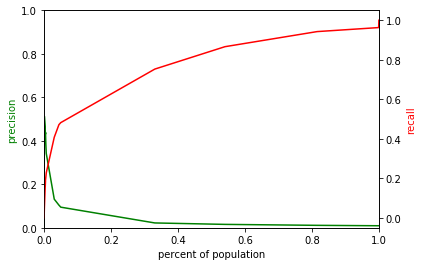

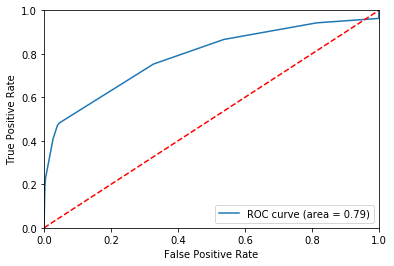

DT{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

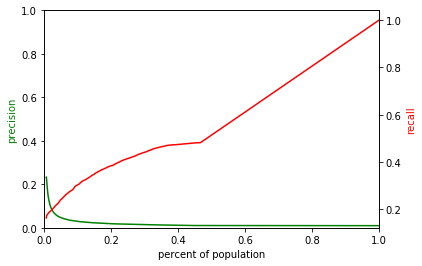

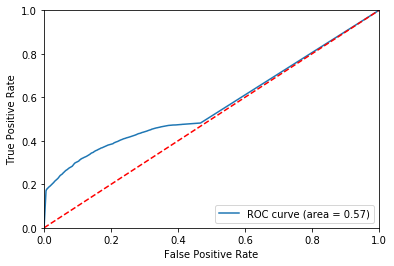

DT{'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

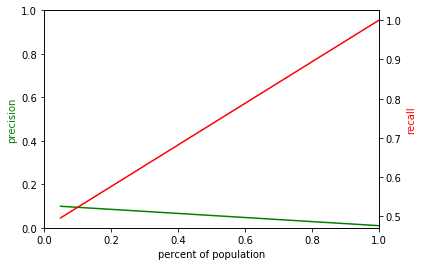

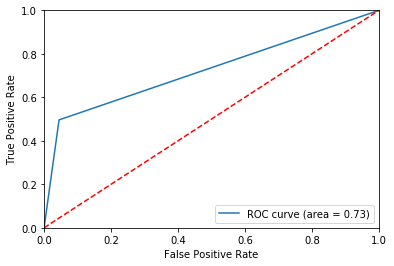

DT{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

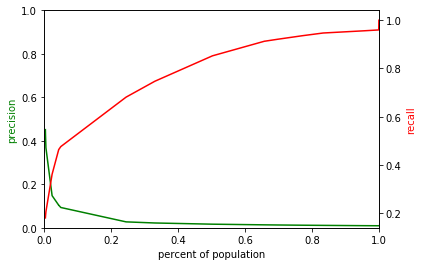

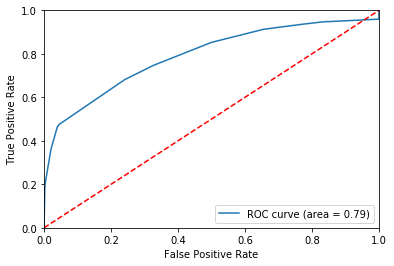

DT{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

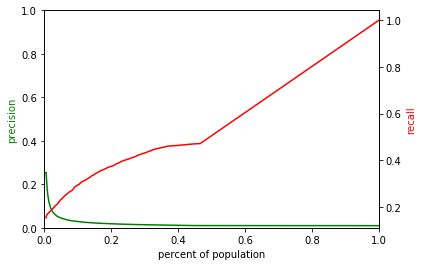

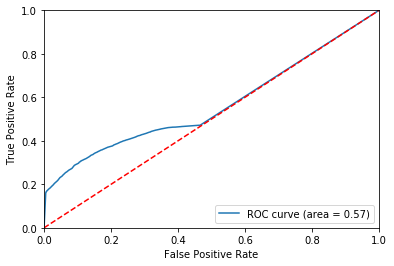

RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

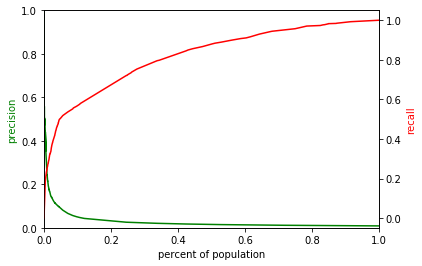

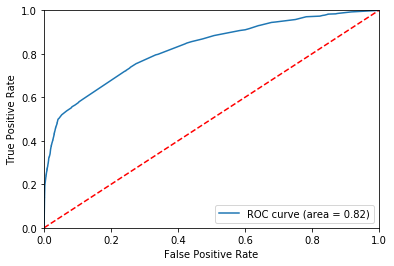

AB{'algorithm': 'SAMME', 'n_estimators': 10}


<Figure size 432x288 with 0 Axes>

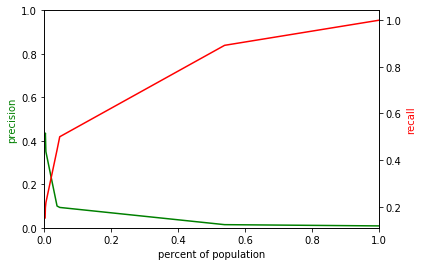

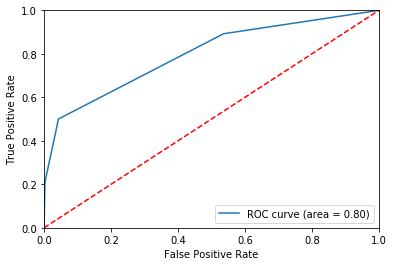

DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

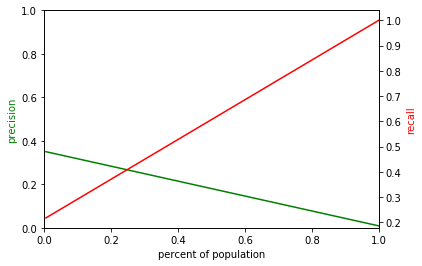

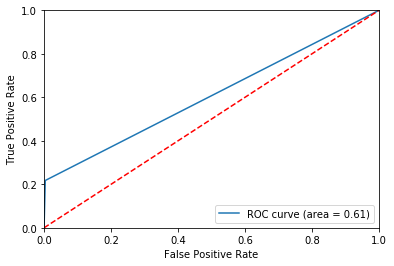

DT{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

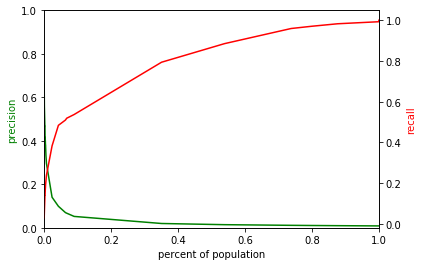

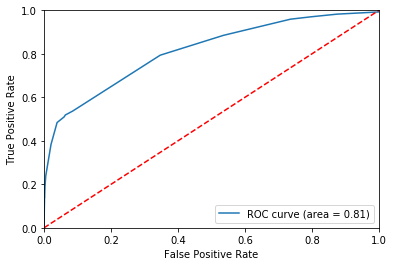

DT{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

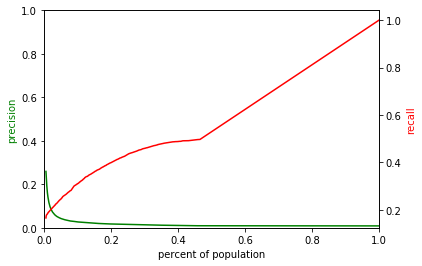

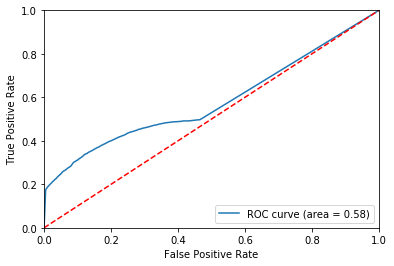

DT{'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

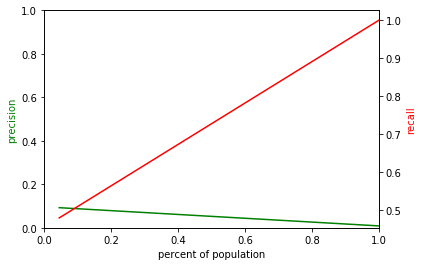

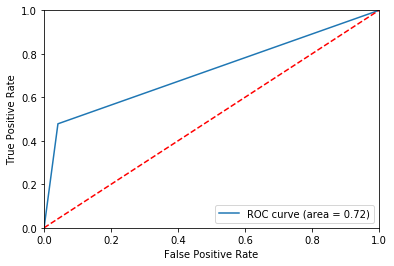

DT{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

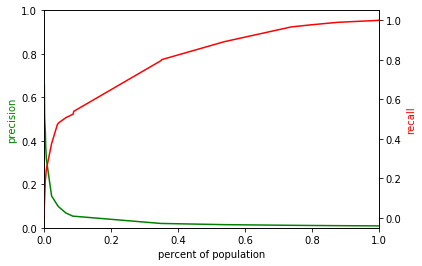

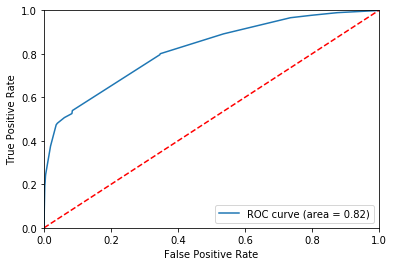

DT{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


<Figure size 432x288 with 0 Axes>

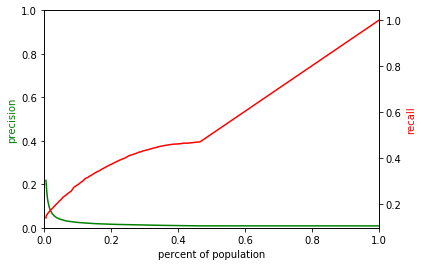

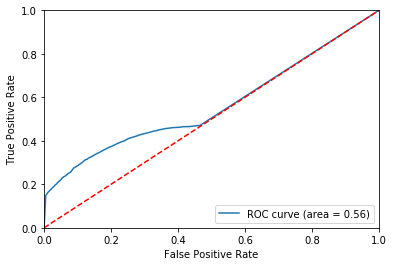

In [10]:
predictions, models, metrics = ep.run_models('small', 'show', [0.8], train_x, train_y, test_x, test_y)

In [39]:
for x in models:
    print(x.model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=

In [33]:
l = list(zip(train_x[0].columns, list(models[2].model.feature_importances_)))


In [37]:
sorted(l, key = lambda x: x[1], reverse = True)

[('DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER', 0.39302725273155564),
 ('NumInMyZIP', 0.22012146392448212),
 ('NumInMyState', 0.173994095421403),
 ('IsTSDF', 0.09530392054541474),
 ('NUMBER_VIOLATIONS_IN_ID_NUMBER', 0.09018720609430653),
 ('IsLQG', 0.013098952177948415),
 ('NUMBER_VIOLATIONS_IN_ZIP_CODE', 0.011316380832157824),
 ('DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE', 0.0029507282727316763),
 ('NUMBER_VIOLATIONS_IN_STATE_CODE', 1.809495137211806e-20),
 ('early  ID_NUMBER avg', 0.0),
 ('last early  ZIP_CODE', 0.0),
 ('early  ZIP_CODE count', 0.0),
 ('early  ID_NUMBER sum', 0.0),
 ('last late  ZIP_CODE', 0.0),
 ('late  ID_NUMBER avg', 0.0),
 ('late  ZIP_CODE avg', 0.0),
 ('early  STATE_CODE count', 0.0),
 ('late  ID_NUMBER count', 0.0),
 ('last late  STATE_CODE', 0.0),
 ('early  ZIP_CODE avg', 0.0),
 ('early  STATE_CODE sum', 0.0),
 ('late  ZIP_CODE sum', 0.0),
 ('late  STATE_CODE sum', 0.0),
 ('last late  ID_NUMBER', 0.0),
 ('early  ZIP_CODE sum', 0.0),
 ('last early  STATE_CODE', 0.0),
 ('late  

In [42]:
 metrics.head(25)

,precision_0.2pct,recall_0.2pct,f1_0.2pct
model,,,
"DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}",0.390636,0.215270,0.277053
"AB{'algorithm': 'SAMME', 'n_estimators': 10}",0.103359,0.511259,0.171884
"DT{'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}",0.101917,0.488612,0.168583
"DT{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}",0.053737,0.564125,0.097213
"DT{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}",0.044465,0.630930,0.081467
"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}",0.031463,0.675030,0.060027
"DT{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}",0.019224,0.383167,0.036603
"DT{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}",0.018717,0.372384,0.035634


In [45]:
ab_list = [x for x in models if x.name == '''AB{'algorithm': 'SAMME', 'n_estimators': 10}''']

In [46]:
len(ab_list)

5

In [54]:
best_ab_features = list(zip(train_x[0].columns, list(ab_list[0].model.feature_importances_)))

In [56]:
sorted(best_ab_features, key = lambda x: x[1], reverse = True)

[('IsTSDF', 0.7810831971435089),
 ('DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER', 0.12089943512834082),
 ('NumInMyState', 0.0980173677281504),
 ('early  ID_NUMBER avg', 0.0),
 ('last early  ZIP_CODE', 0.0),
 ('NUMBER_VIOLATIONS_IN_STATE_CODE', 0.0),
 ('DAYS_SINCE_VIOLATIONS_IN_STATE_CODE', 0.0),
 ('early  ZIP_CODE count', 0.0),
 ('IsLQG', 0.0),
 ('early  ID_NUMBER sum', 0.0),
 ('last late  ZIP_CODE', 0.0),
 ('NUMBER_VIOLATIONS_IN_ZIP_CODE', 0.0),
 ('late  ID_NUMBER avg', 0.0),
 ('late  ZIP_CODE avg', 0.0),
 ('early  STATE_CODE count', 0.0),
 ('late  ID_NUMBER count', 0.0),
 ('last late  STATE_CODE', 0.0),
 ('early  ZIP_CODE avg', 0.0),
 ('early  STATE_CODE sum', 0.0),
 ('late  ZIP_CODE sum', 0.0),
 ('late  STATE_CODE sum', 0.0),
 ('last late  ID_NUMBER', 0.0),
 ('early  ZIP_CODE sum', 0.0),
 ('last early  STATE_CODE', 0.0),
 ('DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE', 0.0),
 ('late  ID_NUMBER sum', 0.0),
 ('early  STATE_CODE avg', 0.0),
 ('early  ID_NUMBER count', 0.0),
 ('late  STATE_CODE count', 0.